# PARADOJA DE SIMPSONS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
penguins_df = sns.load_dataset('penguins')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## ELIMINAMOS NULOS

In [15]:
penguins_df.dropna(inplace=True)
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## CORRELACIÓN DE VARIABLES

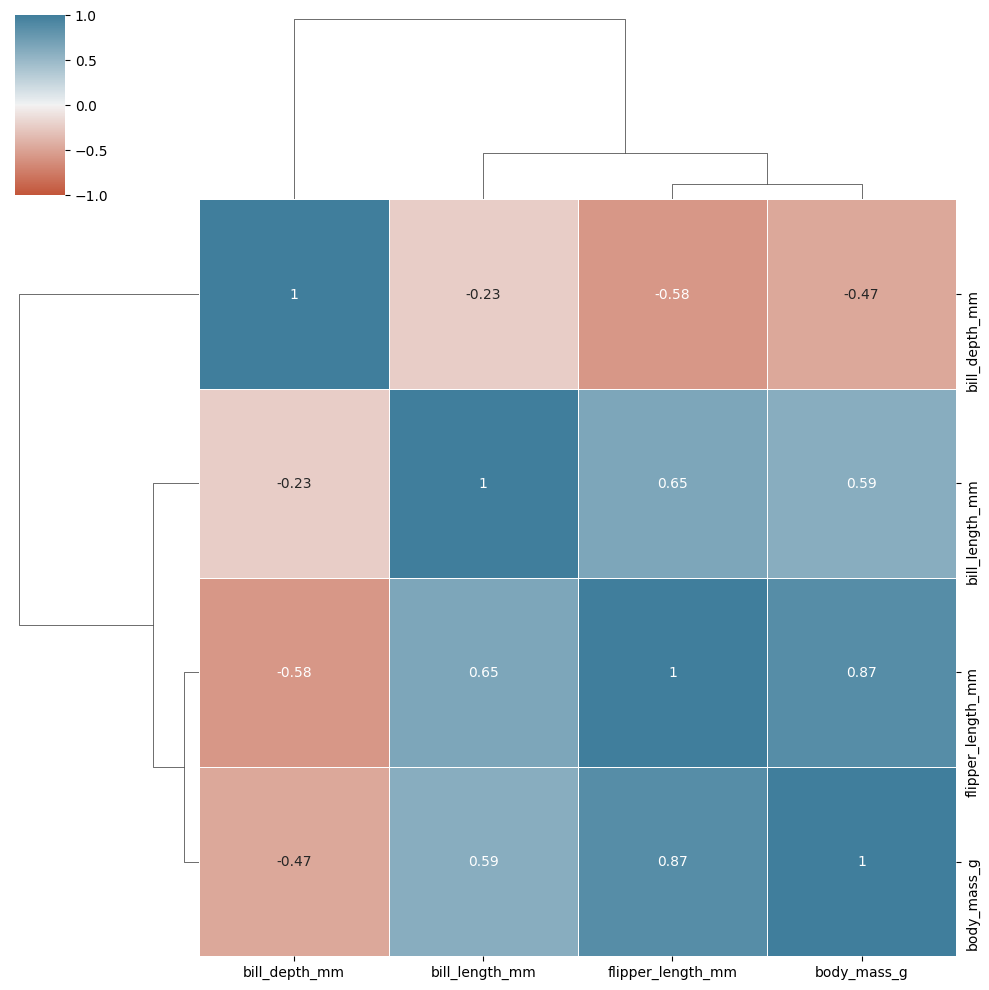

In [4]:
sns.clustermap(
    data=penguins_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink':0.5},
    annot=True
)

# PARADOJA DE SIMPSON

## ANALIZAMOS LA RELACIÓN TOTAL ENTRE EL BILL_LENGTH_MM y EL BILL_DEPTH_MM

In [6]:

%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

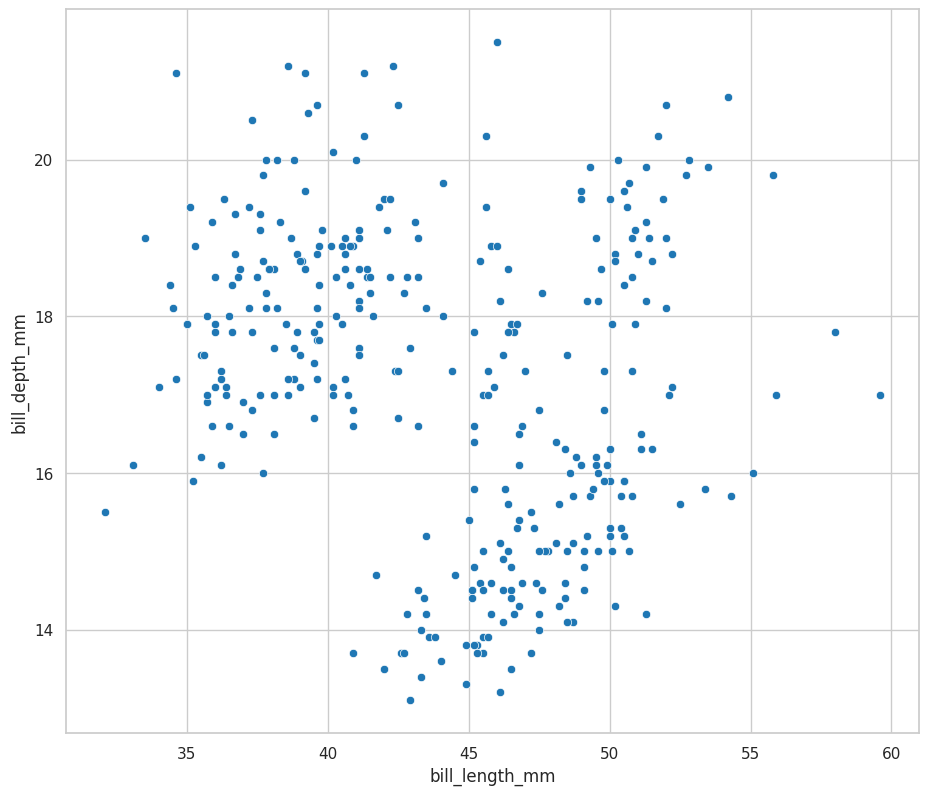

In [7]:
sns.scatterplot(
    data=penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

## ANALIZAMOS RELACIÓN PARCIAL (AGRUPAR LOS RESULTADOS POR LA SPECIE)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

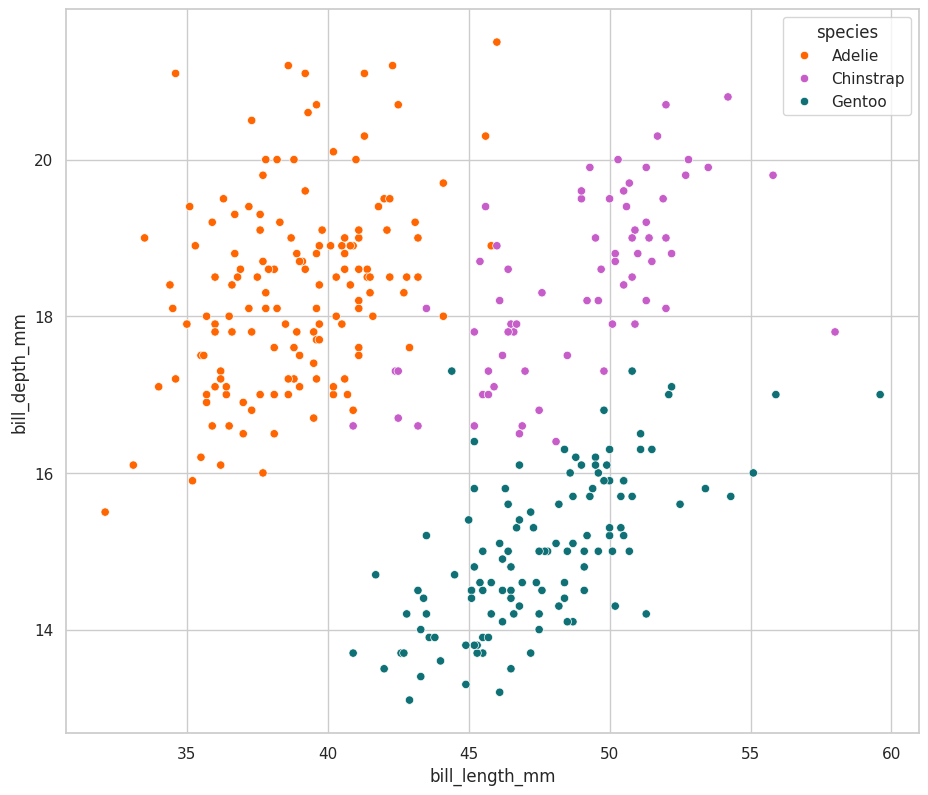

In [9]:
sns.scatterplot(
    data=penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    palette=penguin_color
)

## GRAFICAMOS UNA REGRESION LINEAL SIMPLE PARA ESTA AGRUPACIÓN

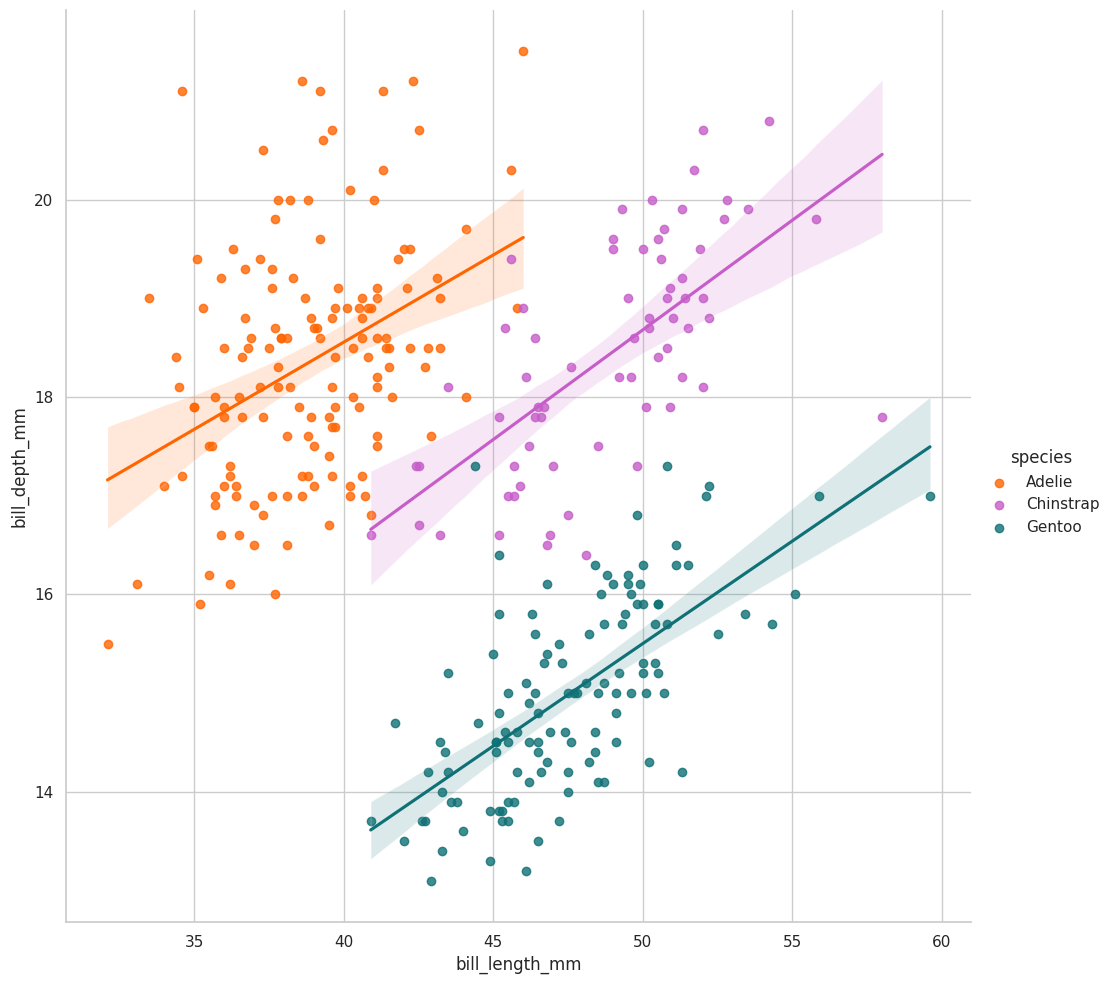

In [14]:
sns.lmplot(
    data=penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    height=10,
    palette=penguin_color
)

## APLICAMOS LA AGRUPACIÓN PARA EL FLIPPER_LENGTH_MM Y BODY_MASS_G

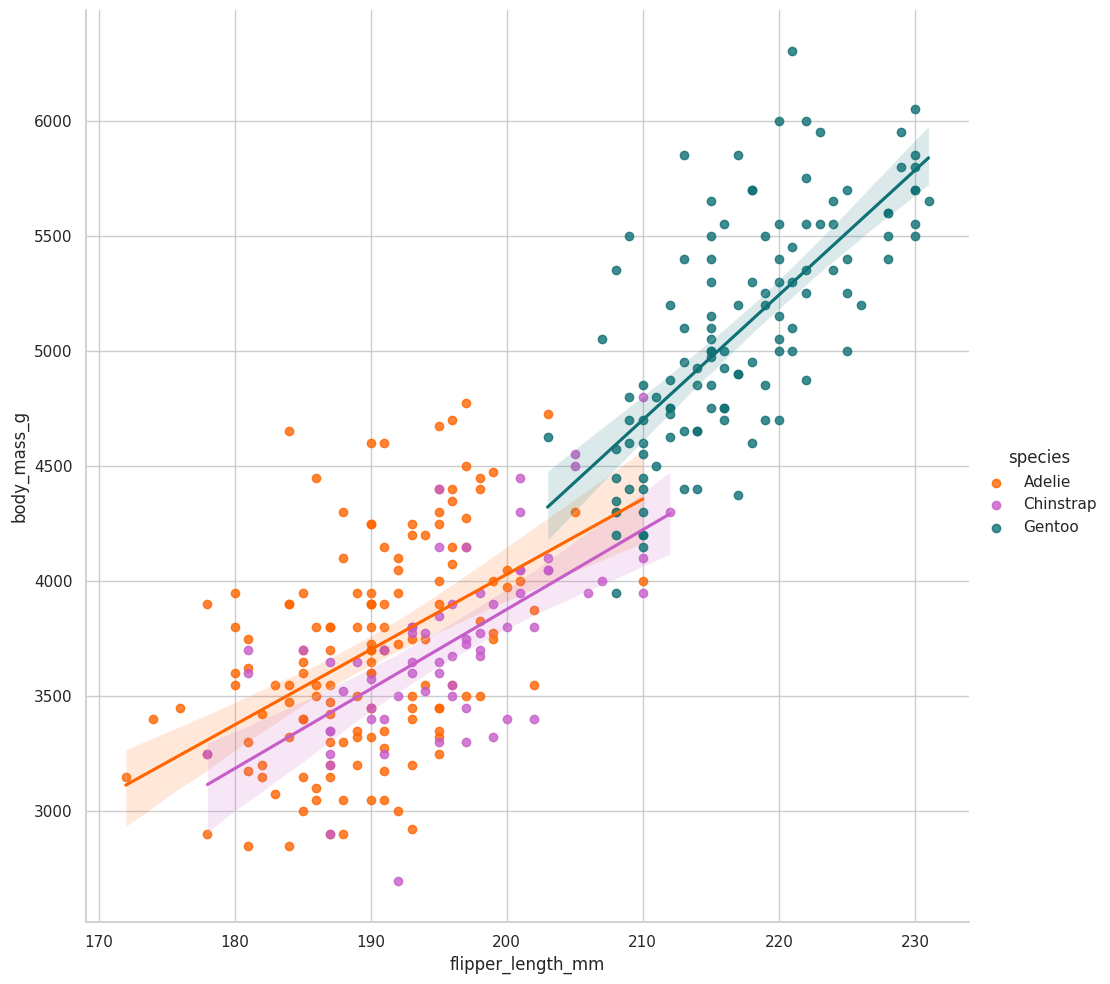

In [12]:
sns.lmplot(
    data=penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='species',
    height=10,
    palette=penguin_color
)

## APLICAMOS LA REGRESIÓN LINEAL MULTIPLE AGRUPANDOLA POR SPECIES

Regresión lineal del dataset completo:
                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          3.13e-105
Time:                        01:38:04   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

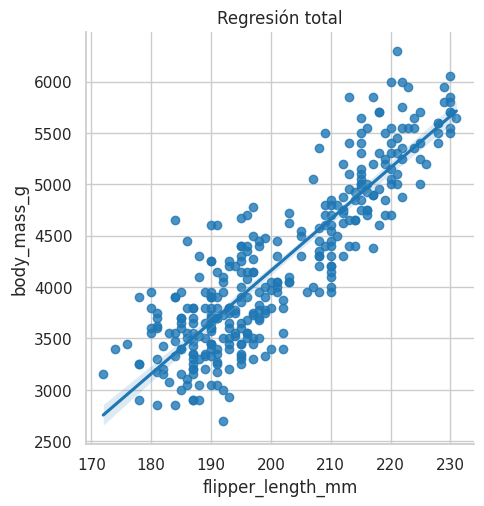

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo_total = smf.ols("body_mass_g ~ flipper_length_mm",data=penguins_df).fit()
print("Regresión lineal del dataset completo:")
print(modelo_total.summary())

sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins_df)
plt.title('Regresión total')
plt.show()

# REGRESIÓN LINEAL PARCIAL

Regresión lineal para Adelie
                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     39.69
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           3.40e-09
Time:                        01:38:41   Log-Likelihood:                -1083.6
No. Observations:                 146   AIC:                             2171.
Df Residuals:                     144   BIC:                             2177.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept

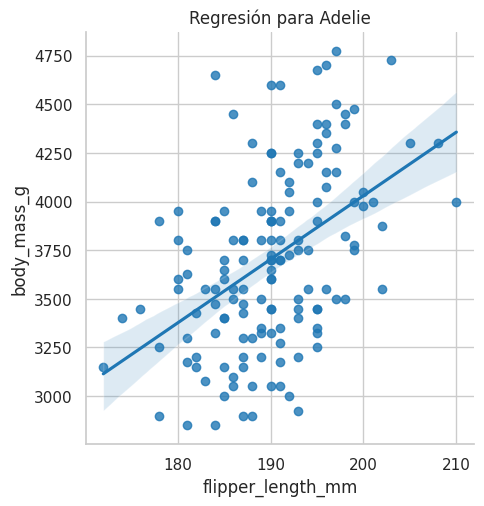

Regresión lineal para Chinstrap
                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     46.17
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           3.75e-09
Time:                        01:38:41   Log-Likelihood:                -482.66
No. Observations:                  68   AIC:                             969.3
Df Residuals:                      66   BIC:                             973.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Interc

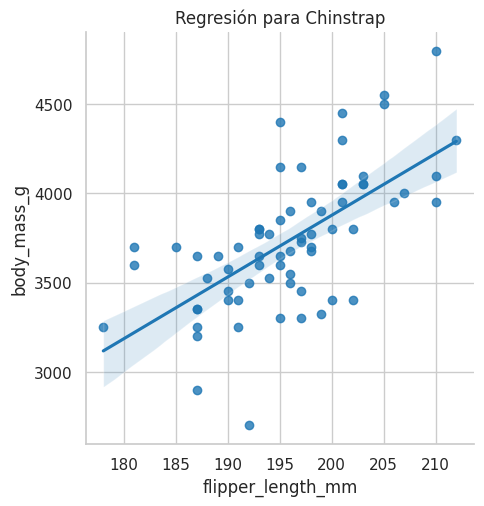

Regresión lineal para Gentoo
                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     119.8
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.25e-19
Time:                        01:38:42   Log-Likelihood:                -866.29
No. Observations:                 119   AIC:                             1737.
Df Residuals:                     117   BIC:                             1742.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept

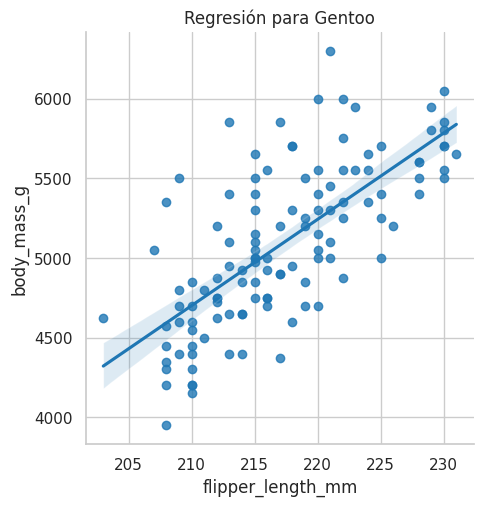

In [19]:
#modelo parcial por species
species_models = {}
for species,df in penguins_df.groupby('species'):
  model = smf.ols("body_mass_g ~ flipper_length_mm",data=df).fit()
  species_models[species] = model
  print(f'Regresión lineal para {species}')
  print(model.summary())
  sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=df)
  plt.title(f'Regresión para {species}')
  plt.show()

